## 타이타닉 데이터로 생존자 예측을 위한 EDA


[데이터 링크] https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# train.csv 파일 불러오기
titanic = pd.read_csv('./data/titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Q1. 데이터에서 남녀 성비를 구해주세요. 577 : 314
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# Q2. 데이터에서 여성 승객들의 평균 fare를 구해주세요.
titanic.pivot_table(values='Fare', index='Sex', aggfunc='mean').loc['female']

Fare    44.479818
Name: female, dtype: float64

In [11]:
# Q3. 이름에 Mr.가 포함된 사람이 몇명인지 구해주세요.
titanic['Name'].apply(lambda n: 'Mr.' in n).sum()

517

In [13]:
# 결측치를 하나라도 포함하고 있는 데이터가 몇개나 있는지 확인.
titanic.isnull().any(axis=1).sum()

708

## 2.5. Pivot Table을 이용하여 데이터 살펴보기

- pivot table이란 기존 테이블 구조를 특정 column을 기준으로 재구조화한 테이블을 말합니다.

- 특정 column을 기준으로 pivot하기 때문에, 어떤 column에 어떤 연산을 하느냐에 따라서 만들어지는 결과가 바뀝니다.

- 주로 어떤 column을 기준으로 데이터를 해석하고 싶을 때 사용합니다.

In [14]:
# 성별을 기준으로 생존률 파악 --> Mean vs Sum
titanic.pivot_table(values='Survived', index='Sex', aggfunc='mean')

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
titanic.pivot_table(values='Survived', index='Sex', aggfunc='sum')

,Survived
Sex,
female,233
male,109


In [16]:
# 사회 계급을 기준으로 생존률 파악
titanic.pivot_table(values='Survived', index='Pclass', aggfunc='mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


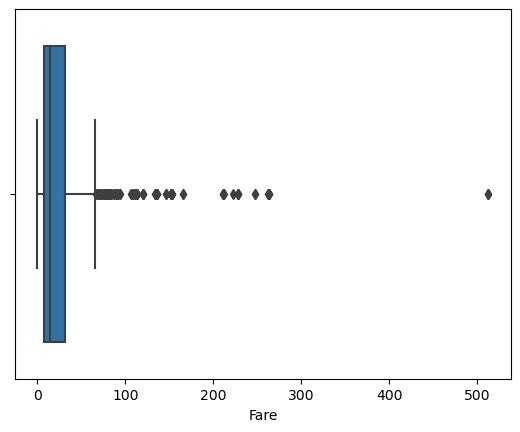

In [19]:
sns.boxplot(data=titanic, x='Fare')
plt.show()

# 1. 결측치가 존재하는지
# 2. dtype이 object인 column이 있는지
# 3. target value의 distribution이 어떻게 되는지

In [20]:
# 1. 결측치가 존재하는지
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic.isnull().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [22]:
titanic[titanic.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
# 2. dtype이 object인 column이 있는지
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
titanic.loc[:, titanic.dtypes=='object']

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [39]:
obj_columns = titanic.columns[titanic.dtypes=='object']
obj_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
# 3. target value의 distribution이 어떻게 되는지

In [30]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

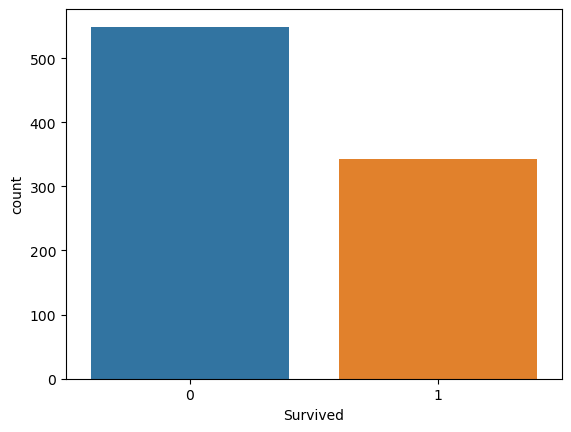

In [32]:
sns.countplot(data=titanic, x='Survived')
plt.show()

In [43]:
# 4. correlation matrix heatmap
obj_columns = titanic.columns[titanic.dtypes=='object']
corr = titanic[titanic.columns.difference(obj_columns)].corr()
corr

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.096067,-0.189119,0.036847,-0.369226,-0.308247,-0.077221
Fare,0.096067,1.000000,0.216225,0.012658,-0.549500,0.159651,0.257307
Parch,-0.189119,0.216225,1.000000,-0.001652,0.018443,0.414838,0.081629
PassengerId,0.036847,0.012658,-0.001652,1.000000,-0.035144,-0.057527,-0.005007
Pclass,-0.369226,-0.549500,0.018443,-0.035144,1.000000,0.083081,-0.338481
SibSp,-0.308247,0.159651,0.414838,-0.057527,0.083081,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


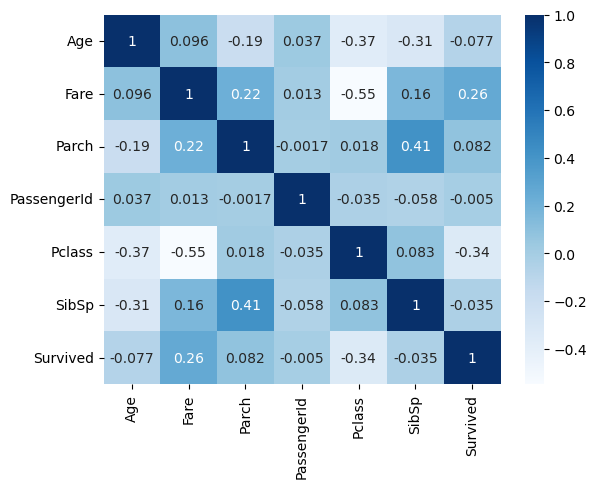

In [44]:
sns.heatmap(data=corr, annot=True, cmap='Blues')
plt.show()